In [193]:
import pandas as pd
data = pd.read_csv("iris.data", delimiter=',', header=None)

In [195]:
y = data[4]
x = data.drop(columns=[4])

In [196]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y1 = labelencoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , Y , test_size = 0.2 , random_state = 0)

In [198]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [200]:
model = Sequential()

model.add(Dense(8, input_shape = (4,), activation='relu'))
model.add(Dense(8, activation='relu' ))
model.add(Dense(3,  activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [201]:
output = model.fit(x_train, y_train, batch_size = 5, epochs=30)

Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 1.8175 - accuracy: 0.3083
Epoch 2/30
24/24 [==============================] - 0s 1ms/step - loss: 1.2614 - accuracy: 0.3083
Epoch 3/30
24/24 [==============================] - 0s 1ms/step - loss: 0.9735 - accuracy: 0.3417
Epoch 4/30
24/24 [==============================] - 0s 1ms/step - loss: 0.8335 - accuracy: 0.5083
Epoch 5/30
24/24 [==============================] - 0s 1ms/step - loss: 0.7419 - accuracy: 0.8083
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.8083
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7083
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7167
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.8000
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7583
Epoch 11/30
24/24 [

In [202]:
y_pred = model.predict(x_test)
#y_pred = (y_pred > 5)

1/1 [==============================] - 0s 41ms/step


In [203]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
accuracy_score(y_test_class, y_pred_class)

0.9666666666666667

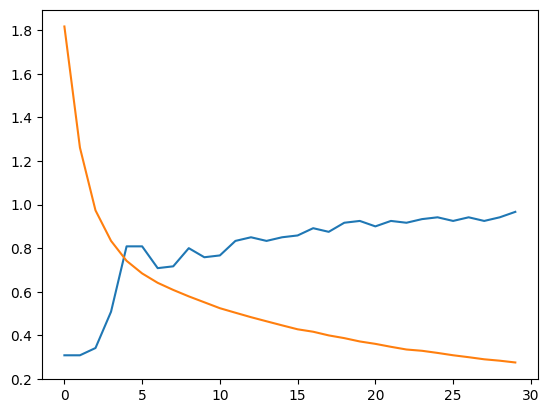

In [204]:
import matplotlib.pyplot as plt
plt.plot(output.history['accuracy'])
plt.plot(output.history['loss'])
plt.show()